In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MOCAP Camera (no headset) - MOTA

In [32]:
results_files = ['../../results/mocap_cam/no_headset/mocap_cam_1_results.csv',
                 '../../results/mocap_cam/no_headset/mocap_cam_2_results.csv',
                 '../../results/mocap_cam/no_headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Count gt, fp, fn, and ids
    gt=0
    fp=0
    fn=0
    ids=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])

    ids += (len(gt1_ids)-1)
    ids += (len(gt2_ids)-1)

    print(file.split('/')[-1])
    print("fp: %s" % fp)
    print("fn: %s" % fn)
    print("gt: %s" % gt)
    print("ids: %s" % ids)
    print(gt1_ids)
    print(gt2_ids)
    print("MOTA: %s" % (1 - (fp+fn+ids)/gt))
    print()

mocap_cam_1_results.csv
fp: 32
fn: 208
gt: 1308
ids: 4
[1.0, 2.0, 4.0, 5.0]
[0.0, 7.0]
MOTA: 0.8134556574923547

mocap_cam_2_results.csv
fp: 20
fn: 147
gt: 1312
ids: 8
[0.0, 2.0, 0.0, 4.0, 0.0, 5.0, 6.0]
[1.0, 0.0, 5.0]
MOTA: 0.8666158536585366

mocap_cam_3_results.csv
fp: 0
fn: 354
gt: 1306
ids: 16
[1.0, 3.0, 5.0, 7.0, 6.0, 9.0, 11.0]
[0.0, 4.0, 6.0, 8.0, 6.0, 8.0, 6.0, 9.0, 10.0, 11.0, 12.0]
MOTA: 0.7166921898928025



# MOCAP Camera (no headset) - Plots

mocap_cam_1_results.csv
[1.0, 2.0, 4.0, 5.0]
[0.0, 7.0]

mocap_cam_2_results.csv
[0.0, 2.0, 0.0, 4.0, 0.0, 5.0, 6.0]
[1.0, 0.0, 5.0]

mocap_cam_3_results.csv
[1.0, 3.0, 5.0, 7.0, 6.0, 9.0, 11.0]
[0.0, 4.0, 6.0, 8.0, 6.0, 8.0, 6.0, 9.0, 10.0, 11.0, 12.0]



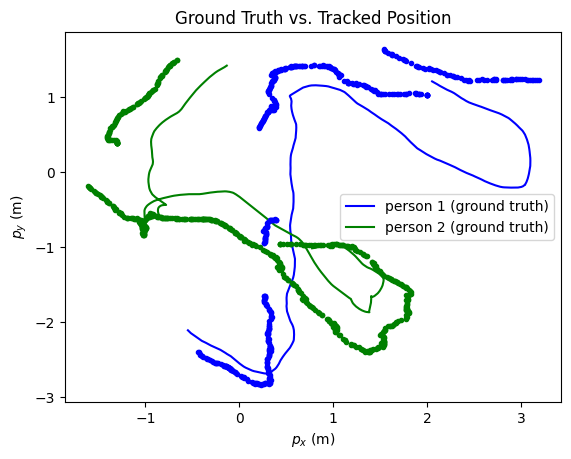

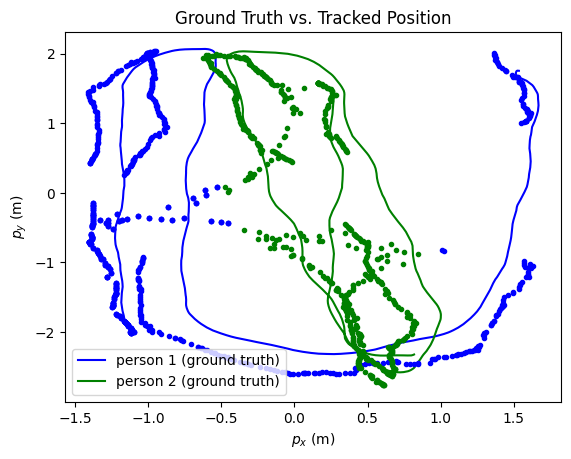

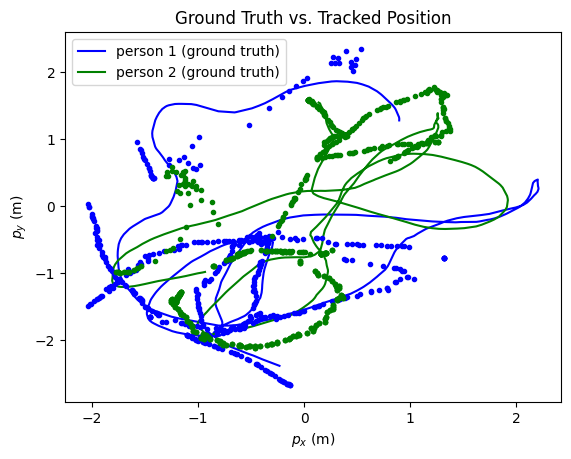

In [134]:
results_files = ['../../results/mocap_cam/no_headset/mocap_cam_1_results.csv',
                 '../../results/mocap_cam/no_headset/mocap_cam_2_results.csv',
                 '../../results/mocap_cam/no_headset/mocap_cam_3_results.csv']


for file in results_files:
    # Load dataframe
    results_df = pd.read_csv(file)
    
    # Track ids for each ground truth object
    fn=0
    gt1_ids=[]
    gt2_ids=[]
    
    for idx,row in results_df.iterrows():
        # print(row)
        gt+=2 # add 2 since there are 2 objects
        fp+=row['unmatched_trks'] # tracking something other than ground truth objects        
        
        if row.isnull()['track1_id']:
            fn+=1
        else: # actual id
            if len(gt1_ids)==0:
                gt1_ids.append(row['track1_id'])
            if row['track1_id']!=gt1_ids[-1]:
                gt1_ids.append(row['track1_id'])
                   
            
        if row.isnull()['track2_id']:
            fn+=1
        else: # actual id
            if len(gt2_ids)==0:
                gt2_ids.append(row['track2_id'])
            
            if row['track2_id']!=gt2_ids[-1]:
                gt2_ids.append(row['track2_id'])


    print(file.split('/')[-1])
    print(gt1_ids)
    print(gt2_ids)

    # Get indices of track ids
    trk1_masks = []
    trk2_masks = []
    for id in gt1_ids:
        trk1_masks.append([results_df.index[results_df['track1_id']==id]])
    for id in gt2_ids:
        trk2_masks.append([results_df.index[results_df['track2_id']==id]])

    plot_str = 'results_df[\'gt1_x\'],results_df[\'gt1_y\'],\'b-\',results_df[\'gt2_x\'],results_df[\'gt2_y\'],\'g-\''
    legend_str = '\'person 1 (ground truth)\',\'person 2 (ground truth)\''

    for ii,id in enumerate(gt1_ids):
        plot_str += ',results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_x\'],results_df.iloc[trk1_masks[' + str(ii) + '][0]][\'track1_y\'],\'b.\''
        # legend_str += ',\'person 1 (fragment '+ str(int(id)) +')\''
        
    for ii,id in enumerate(gt2_ids):
        plot_str += ',results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_x\'],results_df.iloc[trk2_masks[' + str(ii) + '][0]][\'track2_y\'],\'g.\''
        # legend_str += ',\'person 2 (fragment '+ str(int(id)) +')\''

    print()
    plt.figure()
    exec("plt.plot(" + plot_str +")")
    exec("plt.legend([" + legend_str + "])")
    plt.title("Ground Truth vs. Tracked Position")
    plt.xlabel("$p_x$ (m)")
    plt.ylabel("$p_y$ (m)")
 